In [1]:
from bbref_scraper import SCRAPER
import numpy as np

In [2]:
scraper = SCRAPER()
years = np.arange(2000, 2023)
years

array([2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010,
       2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021,
       2022])

In [3]:
scraper.scrape([2000, 2022], save = False)

2022 ... 30/30 ... OKC   [200]


In [8]:
scraper.X.get(2022)

,ID,Date,G_home,G_away,Home,Away,W_home,PTS_home,PTS_away,PTS_diff,...,DRtg_2_away,DRtg_5_away,DRtg_10_away,DRtg_25_away,NRtg_away,NRtg_1_away,NRtg_2_away,NRtg_5_away,NRtg_10_away,NRtg_25_away
0,211019LALGSW,2021-10-19,1,1,LAL,GSW,0,114,121,-7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,211019MILBRK,2021-10-19,1,1,MIL,BRK,1,127,104,23,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,211020MINHOU,2021-10-20,1,1,MIN,HOU,1,124,106,18,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,211020PORSAC,2021-10-20,1,1,POR,SAC,0,121,124,-3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,211020NYKBOS,2021-10-20,1,1,NYK,BOS,1,138,134,4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1225,220410DALSAS,2022-04-10,82,82,DAL,SAS,1,130,120,10,...,113.5,105.4,106.6,115.64,0.246914,-6.0,-6.0,9.4,9.2,0.76
1226,220410DENLAL,2022-04-10,82,82,DEN,LAL,0,141,146,-5,...,114.5,118.6,120.5,120.04,-3.148148,19.0,1.5,-4.4,-5.5,-6.68
1227,220410ORLMIA,2022-04-10,82,82,ORL,MIA,1,125,111,14,...,112.0,108.0,109.2,107.80,4.679012,4.0,16.5,12.8,4.3,4.60
1228,220410CHOWAS,2022-04-10,82,82,CHO,WAS,1,124,108,16,...,116.0,118.6,113.6,116.20,-3.222222,-22.0,-18.5,-5.8,-2.6,-3.60


In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


dt = pd.concat([scraper.X.get(2000), scraper.X.get(2022)])

/var/folders/x8/gymrgfns32bd6rd_ksf19p3m0000gn/T/ipykernel_66979/3714018371.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(dt.PTS_diff, shade = True)


<Axes: xlabel='PTS_diff', ylabel='Density'>

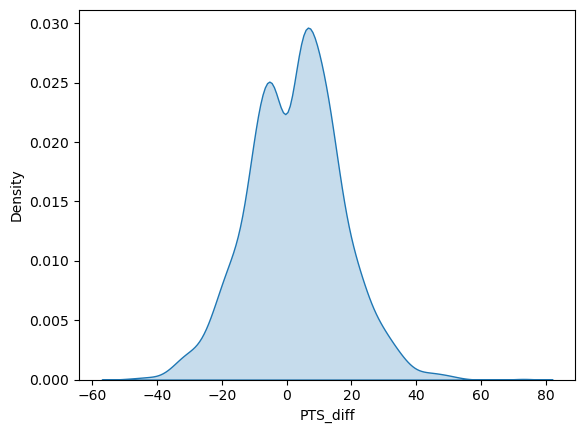

In [30]:
sns.kdeplot(dt.PTS_diff, shade = True)

In [58]:
dt = dt[(dt['G_away'] > 24) & (dt['G_home'] > 24)]
dt = dt.reset_index(drop = True)

In [60]:
X = dt[scraper.features]
y = dt[['W_home', 'PTS_diff']]

In [64]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 2)
pcs = pca.fit_transform(X)

In [68]:
res = pd.DataFrame(pcs, columns = ['PC1', 'PC2'])
res['W'] = y['W_home']
res['diff'] = y['PTS_diff']

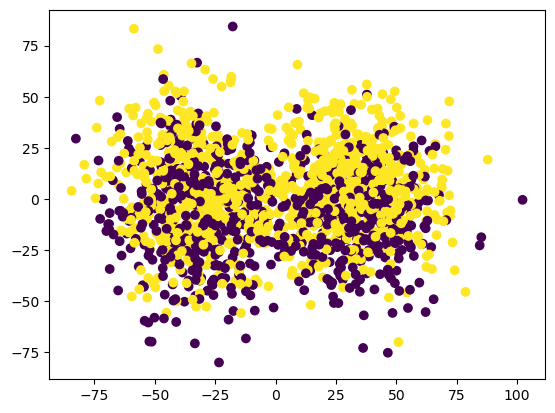

In [69]:
plt.scatter(res['PC1'], res['PC2'], c = res['W'])